In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv("My_Data.csv")

# Display the first few rows
data.head()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare


In [ ]:
# Summary statistics for the numerical columns
summary_stats = data.describe()

summary_stats

,Tasks,AI models,AI_Workload_Ratio
count,4706.000000,4706.000000,4706.000000
mean,400.708032,1817.678071,inf
std,311.564781,1086.853037,NaN
min,1.000000,0.000000,0.036585
25%,161.000000,1085.250000,0.137271
50%,270.000000,1577.500000,0.199281
75%,608.750000,2273.000000,0.260572
max,1387.000000,5666.000000,inf


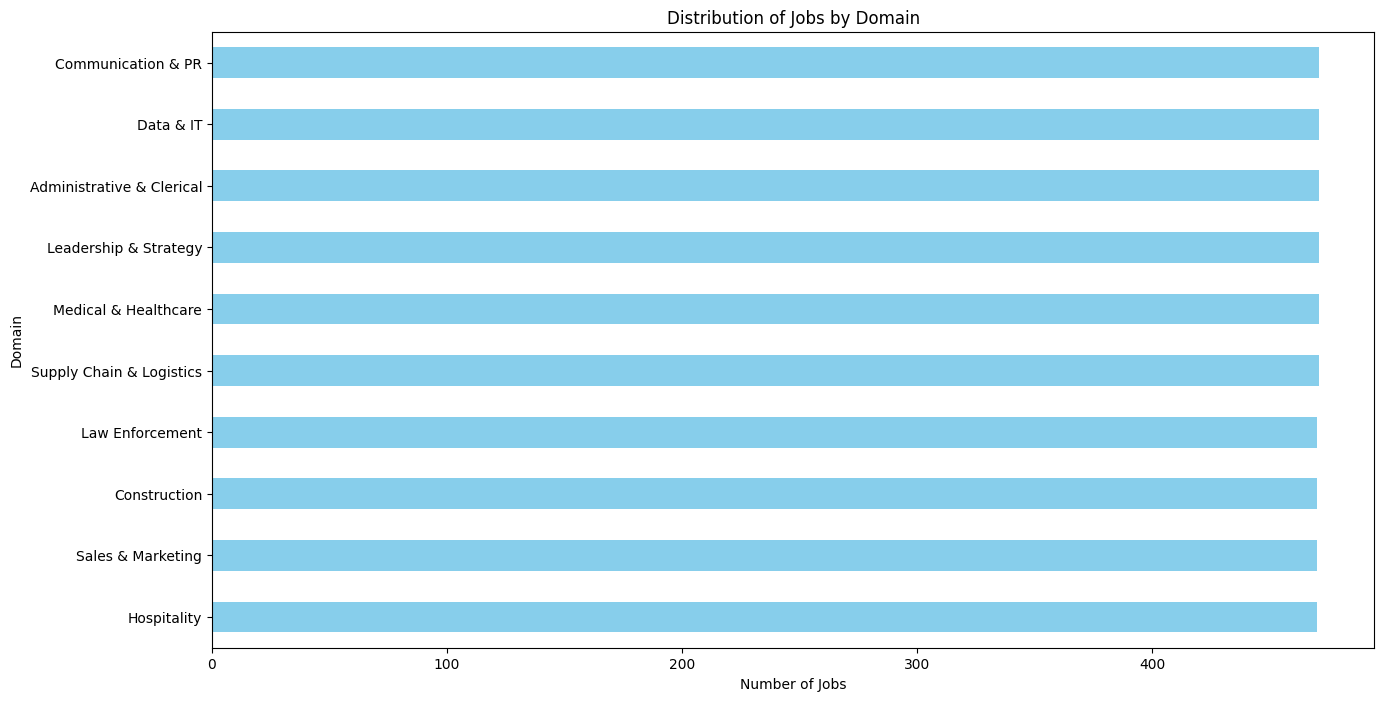

In [ ]:
import matplotlib.pyplot as plt

# Distribution of jobs by domain
domain_counts = data['Domain'].value_counts()

plt.figure(figsize=(15, 8))
domain_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Jobs')
plt.ylabel('Domain')
plt.title('Distribution of Jobs by Domain')
plt.gca().invert_yaxis()
plt.show()

The domain "Data & IT" appears to have the highest number of job titles listed in the dataset.
This is followed by "Medical & Healthcare", "Finance & Accounting", and "Sales & Retail", which also have a significant number of job titles.
Domains like "Architecture & Engineering" and "Legal & Law Enforcement" have fewer job titles in comparison.

CORRELATION ANALYSIS

In [ ]:
import numpy as np

# Replacing infinite values with NaN for the AI_Workload_Ratio column
data['AI_Workload_Ratio'] = data['AI_Workload_Ratio'].replace([float('inf'), -float('inf')], np.nan)

# Correlation matrix for the numerical columns
correlation_matrix = data[['Tasks', 'AI models', 'AI_Workload_Ratio']].corr()

correlation_matrix

,Tasks,AI models,AI_Workload_Ratio
Tasks,1.000000,0.928350,0.631305
AI models,0.928350,1.000000,0.346893
AI_Workload_Ratio,0.631305,0.346893,1.000000


TOP JOBS MOST IMPACTED BY AI

In [ ]:
# Convert "AI Impact" column to numeric by removing the '%' symbol
data['AI Impact'] = data['AI Impact'].str.rstrip('%').astype(float) / 100.0

# Top 10 jobs by AI impact
top_jobs_by_ai_impact = data.sort_values(by='AI Impact', ascending=False).head(10)

top_jobs_by_ai_impact[['Job titiles', 'AI Impact']]

,Job titiles,AI Impact
0,Communications Manager,0.98
2,Data Entry,0.95
3,Mail Clerk,0.95
1,Data Collector,0.95
4,Compliance Officer,0.92
5,Chief Executive Officer (CEO),0.91
13,Data Entry Operator,0.90
19,Web Search Evaluator,0.90
18,Warehouse Worker,0.90
17,Supply Clerk,0.90


DISTRIBUTION OF AI IMPACT

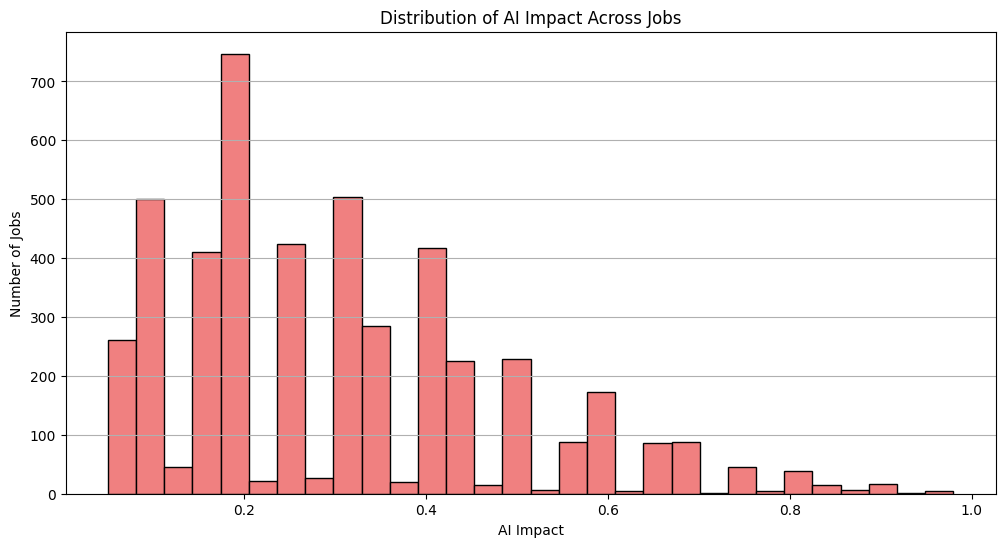

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(data['AI Impact'], bins=30, color='lightcoral', edgecolor='black')
plt.xlabel('AI Impact')
plt.ylabel('Number of Jobs')
plt.title('Distribution of AI Impact Across Jobs')
plt.grid(axis='y')
plt.show()

RELATIONSHIP RATIO

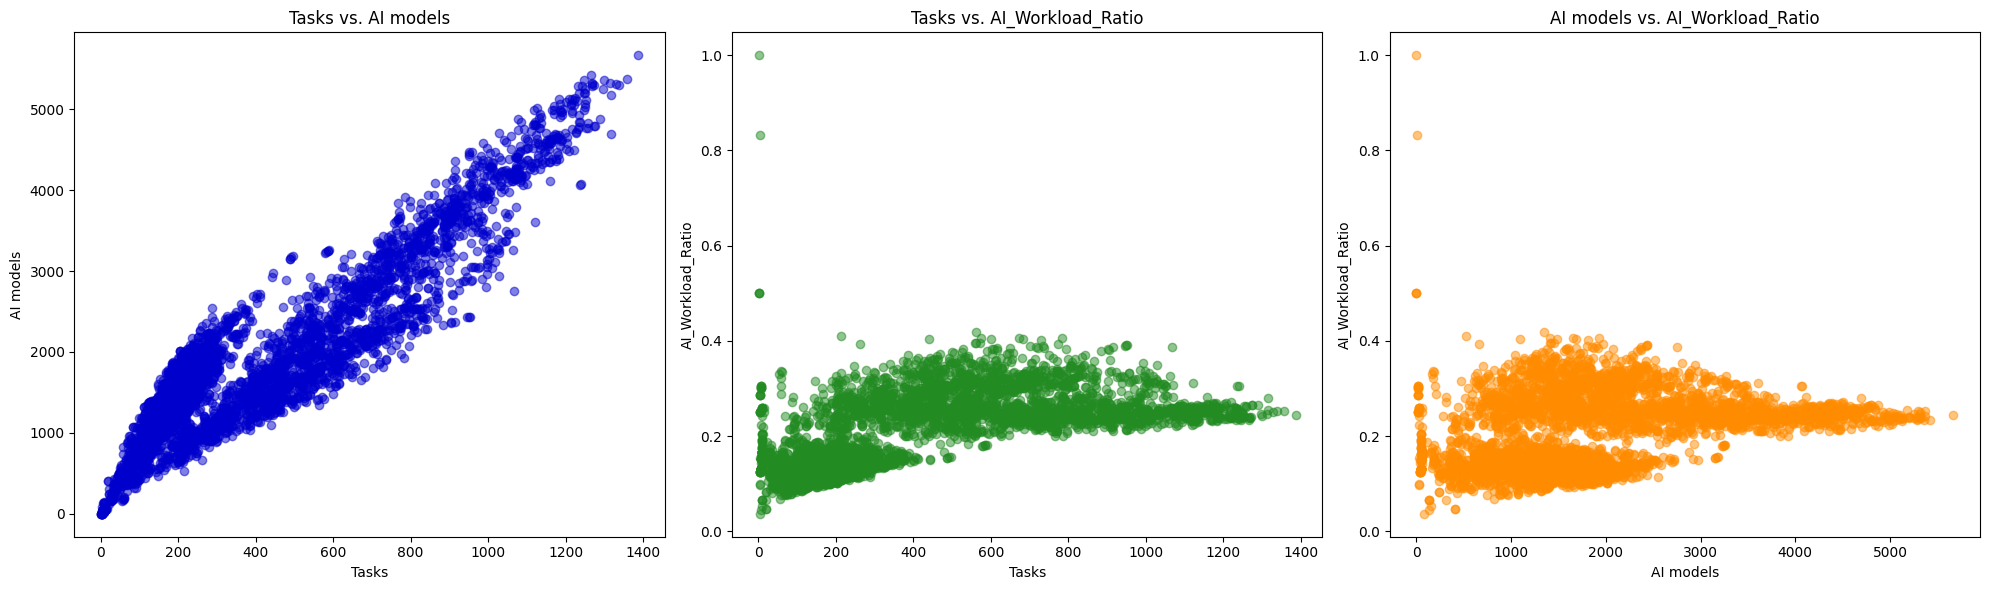

In [ ]:
# Setting up the figure and axes
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Tasks vs. AI models
axs[0].scatter(data['Tasks'], data['AI models'], color='mediumblue', alpha=0.5)
axs[0].set_title('Tasks vs. AI models')
axs[0].set_xlabel('Tasks')
axs[0].set_ylabel('AI models')

# Tasks vs. AI_Workload_Ratio
axs[1].scatter(data['Tasks'], data['AI_Workload_Ratio'], color='forestgreen', alpha=0.5)
axs[1].set_title('Tasks vs. AI_Workload_Ratio')
axs[1].set_xlabel('Tasks')
axs[1].set_ylabel('AI_Workload_Ratio')

# AI models vs. AI_Workload_Ratio
axs[2].scatter(data['AI models'], data['AI_Workload_Ratio'], color='darkorange', alpha=0.5)
axs[2].set_title('AI models vs. AI_Workload_Ratio')
axs[2].set_xlabel('AI models')
axs[2].set_ylabel('AI_Workload_Ratio')

# Adjusting layout
plt.tight_layout()
plt.show()

Tasks vs. AI models:

A strong positive correlation is evident, as we previously identified. As the number of tasks increases, the number of AI models associated with those tasks also tends to increase.
Tasks vs. AI_Workload_Ratio:

A moderate positive relationship is observed. While it's not as strong as the first relationship, there's a clear trend indicating that as the number of tasks increases, the AI_Workload_Ratio also tends to increase.
AI models vs. AI_Workload_Ratio:

This relationship is more dispersed. There's a positive trend, but it's weaker compared to the other two scatter plots. This indicates that while the number of AI models has some influence on the AI_Workload_Ratio, other factors are also at play.

REGRESSION ANALYSIS

In [ ]:
import statsmodels.api as sm

# Drop rows with NaN values in AI_Workload_Ratio for the regression analysis
data_cleaned = data.dropna(subset=['AI_Workload_Ratio'])

# Setting up the independent variables (Tasks and AI models) and the dependent variable (AI_Workload_Ratio)
X = data_cleaned[['Tasks', 'AI models']]
X = sm.add_constant(X)  # Adding a constant for the intercept
y = data_cleaned['AI_Workload_Ratio']

# Performing the regression
model = sm.OLS(y, X).fit()

# Getting the summary of the regression
regression_summary = model.summary()

regression_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      AI_Workload_Ratio   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                 1.012e+04
Date:                Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:14:07   Log-Likelihood:                 9331.0
No. Observations:                4699   AIC:                        -1.866e+04
Df Residuals:                    4696   BIC:                        -1.864e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2060      0.001    204.118      0.000       0.204       0.208
Tasks          0.0005   4.18e-06    131.285      0.000       0.001       0.001
AI models     -0.0001    1.2e-06   -101.486      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     4943.857   Durbin-Watson:                   1.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1953944.386
Skew:                           4.575   Prob(JB):                         0.00
Kurtosis:                     102.479   Cond. No.                     4.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

CLUSTER ANALYSIS

In [ ]:
from sklearn.preprocessing import StandardScaler

# Extracting relevant features for clustering
features = data[['AI Impact', 'Tasks', 'AI models']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features[:5]  # Displaying the first 5 rows of standardized data

array([[ 3.71871241, -0.11462087,  0.67019118],
       [ 3.55389394, -0.32647734,  0.30395741],
       [ 3.55389394, -0.24301873,  0.42358151],
       [ 3.55389394, -0.66673166, -0.41562755],
       [ 3.38907547, -0.66352172, -0.412867  ]])

Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

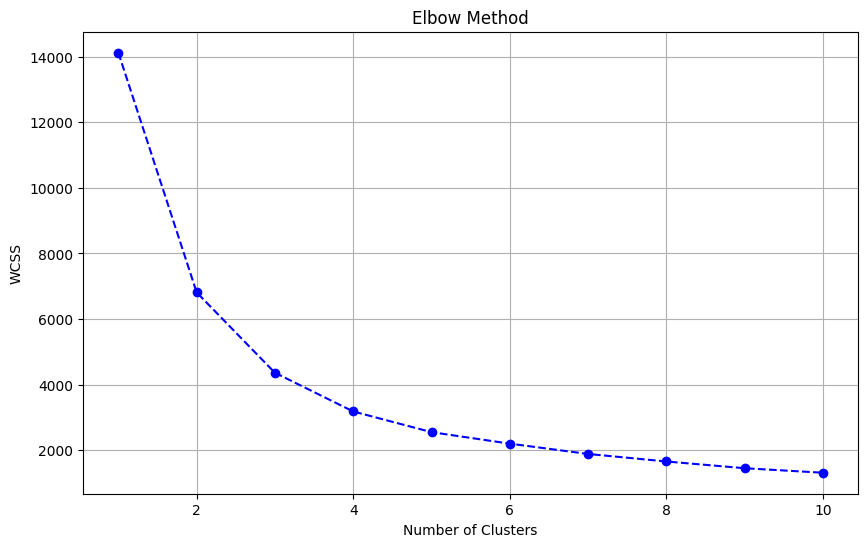

In [ ]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
num_clusters = range(1, 11)  # Checking for up to 10 clusters

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

From the plot, it appears that the "elbow" is somewhere around 3 or 4 clusters, after which the rate of decrease in WCSS slows down. This suggests that using 3 or 4 clusters might be a good choice.

KMeans clustering & Principal Component Analysis (PCA)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


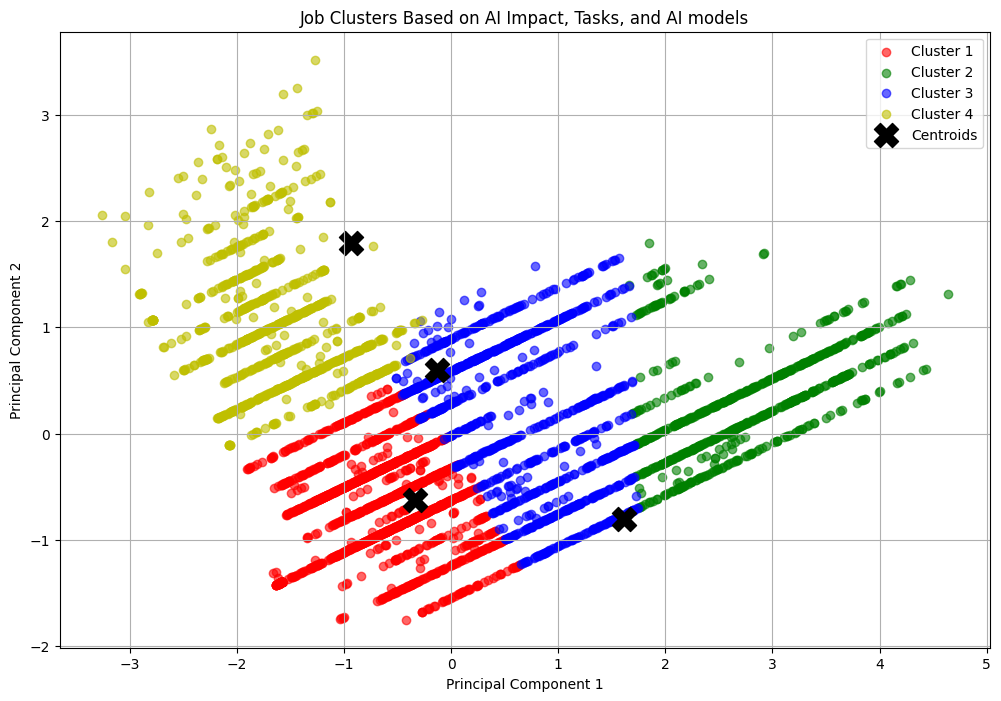

In [ ]:
# Re-importing necessary libraries and preprocessing the data for clustering
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("My_Data.csv")
data['AI Impact'] = data['AI Impact'].str.rstrip('%').astype(float) / 100.0

# Extracting and standardizing the features for clustering
features = data[['AI Impact', 'Tasks', 'AI models']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Using PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Plotting the clusters
plt.figure(figsize=(12, 8))
colors = ['r', 'g', 'b', 'y']
for i in range(4):
    plt.scatter(principal_components[clusters == i, 0], principal_components[clusters == i, 1],
                color=colors[i], label=f'Cluster {i+1}', alpha=0.6)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.title('Job Clusters Based on AI Impact, Tasks, and AI models')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Assigning the cluster labels back to the original data
data['Cluster'] = clusters

# Computing the mean values of the features for each cluster
cluster_means = data.groupby('Cluster')[['AI Impact', 'Tasks', 'AI models']].mean()

cluster_means

,AI Impact,Tasks,AI models
Cluster,,,
0,0.242296,206.181122,1184.673980
1,0.133559,960.470339,3873.461864
2,0.278930,587.729443,2173.064545
3,0.597111,150.917310,1137.690187


In [ ]:
# Determining the most frequent domains for each cluster
most_frequent_domains = data.groupby('Cluster')['Domain'].apply(lambda x: x.value_counts().index[0])

most_frequent_domains

Cluster
0               Data & IT
1             Hospitality
2         Law Enforcement
3    Medical & Healthcare
Name: Domain, dtype: object

In [ ]:
# Finding the most representative job title for each cluster based on proximity to the centroid
representative_jobs = []

for i in range(4):
    # Calculate the distance of each data point in the cluster to the centroid of the cluster
    distances = np.linalg.norm(scaled_features[clusters == i] - kmeans.cluster_centers_[i], axis=1)
    # Identify the index of the minimum distance (closest data point to centroid)
    index_closest = distances.argmin()
    representative_jobs.append(data.iloc[index_closest]['Job titiles'])

representative_jobs

['Graduate Nurse', 'Insurance Sales', 'CNA', 'Accounts Payable']

Heatmap of Correlations: Visual representation of the correlation between all numerical columns.

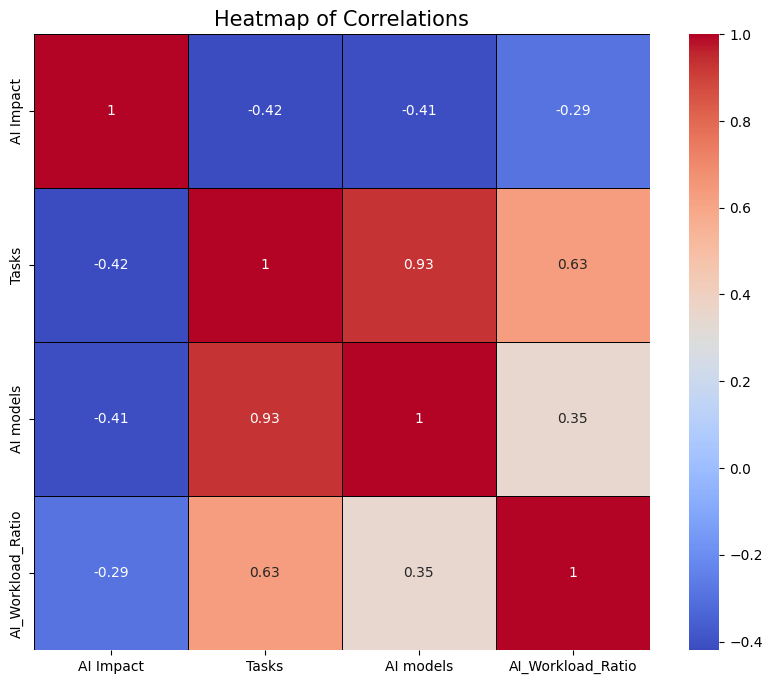

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data[['AI Impact', 'Tasks', 'AI models', 'AI_Workload_Ratio']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', cbar=True, square=True)
plt.title('Heatmap of Correlations', fontsize=15)
plt.show()

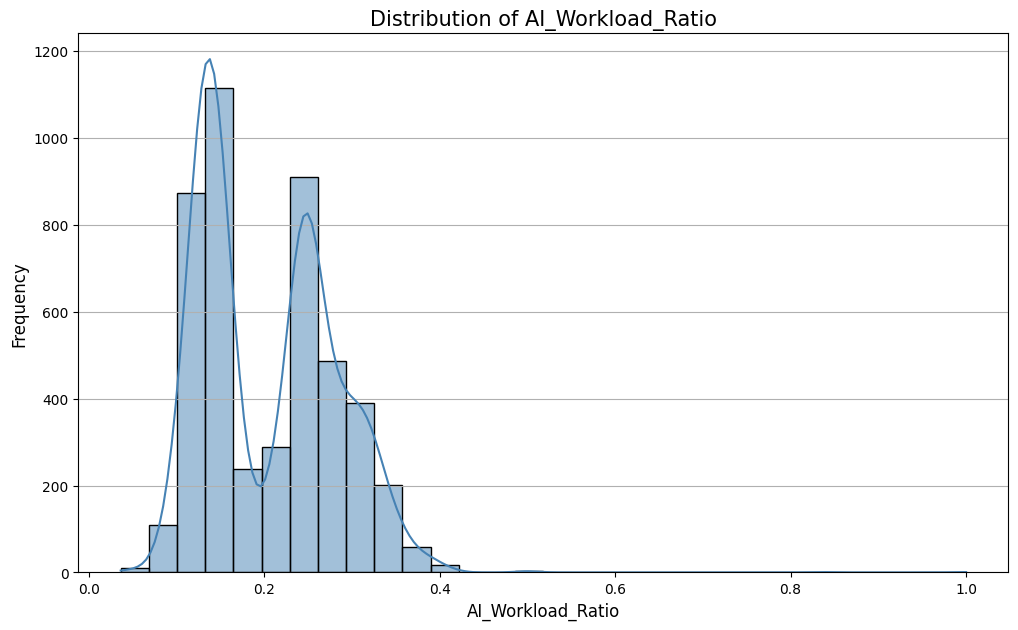

In [ ]:
plt.figure(figsize=(12, 7))
sns.histplot(data=data, x='AI_Workload_Ratio', kde=True, bins=30, color='steelblue', edgecolor='black')
plt.title('Distribution of AI_Workload_Ratio', fontsize=15)
plt.xlabel('AI_Workload_Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

In [ ]:
# Jobs with the lowest AI impact
lowest_ai_impact_jobs = data.sort_values(by='AI Impact', ascending=True).head(10)

lowest_ai_impact_jobs[['Job titiles', 'AI Impact']]

,Job titiles,AI Impact
4705,Technician,0.05
4552,Lead Pastor,0.05
4551,Deaconess,0.05
4550,Bishop,0.05
4549,Zoologist,0.05
4548,Veterinary,0.05
4547,Veterinarian,0.05
4546,Ranch Manager,0.05
4545,Ranch Hand,0.05
4544,Marine Mammal Trainer,0.05
